<a href="https://colab.research.google.com/github/Neelov12/MAT-421-Computational-Methods-Integrated-into-Python/blob/main/Module_B_17_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module B: Section 17.4 and 17.5


## 17.4: Lagrange Polynomial Interpolation

In this section, I write a program that demonstrates the concept of Lagrange Polynomial Interpolation

First, an overview of the topic:

Unline cubic polynomial interpolation that interpolates based on subsequent pairs of data, **Lagrange Polynomial Interpolation** finds a single polynomial, defined by $L(x)$, that goes through all the data points.
<bv>

To compute $L(x)$, we must find Lagrange basis polynomials, $𝑃_𝑖(𝑥)$, where
<bv>

$$
𝑃_𝑖(𝑥) = ∏^n_{j=1, j≠1} \frac{x - x_j}{x_i - x_j}
$$

and
<bv>

$$
𝐿(𝑥)=∑^𝑛_{𝑖=1} 𝑦_𝑖𝑃_𝑖(𝑥)
$$


To demonstrate this concept, I will create a dataset of 25 random points and apply the lagrance polynomial functions to find a polynomial curve of best fit

First, some important imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import lagrange

Plot of dataset

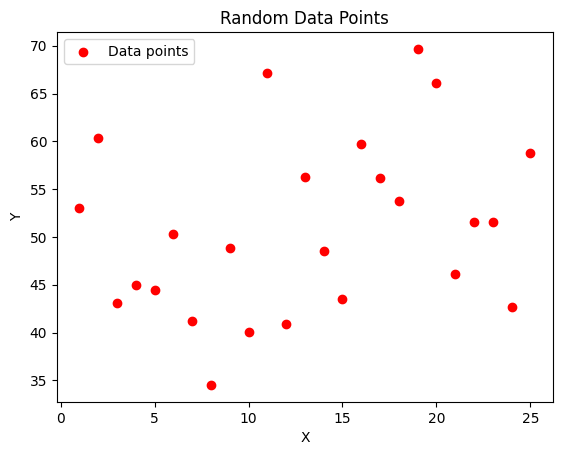

In [2]:
# Step 1: Generate a random dataset of 25 points
x = np.arange(1, 26)  # x values from 1 to 25
y = np.random.randn(25) * 10 + 50  # Random y values with some noise

plt.scatter(x, y, color='red', label='Data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Data Points')
plt.legend()
plt.show()

Computation of the lagrange polynomial and plot of the results:

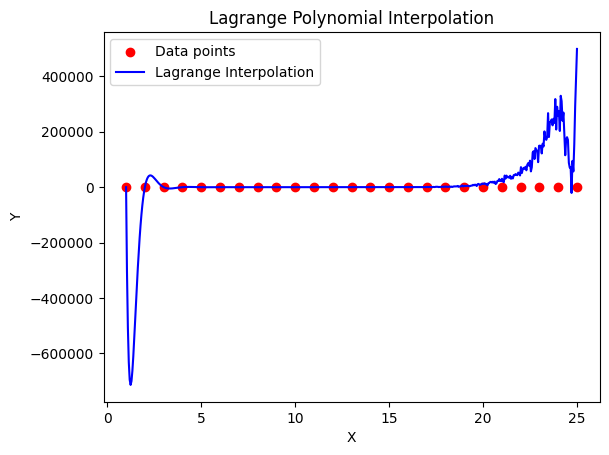

In [13]:
# Compute the Lagrange polynomial
poly = lagrange(x, y)

# Generate x values for plotting the polynomial
x_range = np.linspace(1, 25, 500)

# Evaluate the polynomial for each x value
y_poly = poly(x_range)

# Plot the original data and the Lagrange interpolation
plt.scatter(x, y, color='red', label='Data points')
plt.plot(x_range, y_poly, label='Lagrange Interpolation', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Lagrange Polynomial Interpolation')
plt.legend()
plt.show()

## 17.5: Newton’s Polynomial Interpolation

In this section, I write a program that demonstrates the concept of Newton's Polynomial Interpolation

First, an overview of the topic:

Similar to the previous interpolation techniques, Newton’s polynomial interpolation defines a function that passes through each data point. It is defined by the following formulas:

$$
𝑓(𝑥)=∑_{𝑖=0}^𝑛 𝑎_𝑖𝑛_𝑖(𝑥)
$$
where
$$
𝑛_𝑖(𝑥)=∏_{𝑖−1}^{𝑗=0}(𝑥−𝑥_𝑗)
$$

Essentially, Newton’s polynomial interpolation works by incrementally adding the divided difference between the x and y values of two different data points, allowing new points to be added without having to recalculate the entire polynomial, only the terms corresponding to the new data point

Here is a program that demonstrates this concept. It uses the same random 25 data points as the previous section.

In [4]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

Calculate the divided difference for the dataset

In [21]:
# Calculate the divided difference table
coef = divided_diff(x, y)

# Generate a dense set of x values for plotting the interpolated curve
x_dense = np.arange(min(x), max(x), .100)

# Calculate the corresponding y values for the polynomial interpolation
y_dense = np.array([newton_poly(coef, x, xi) for xi in x_dense])

Plot the results

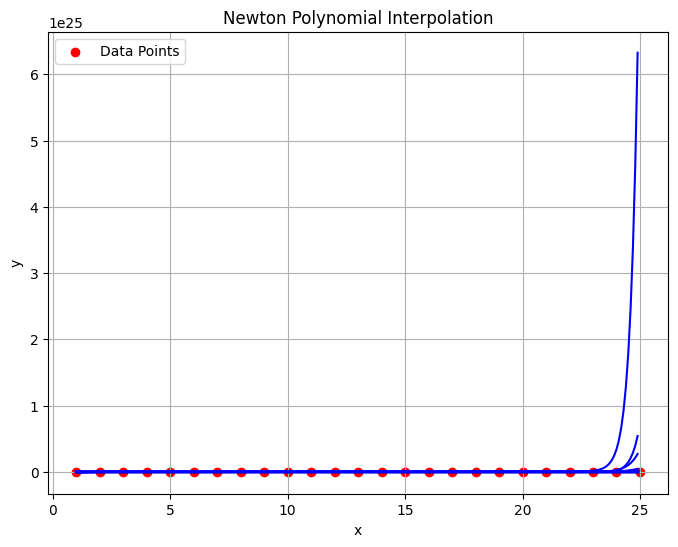

In [22]:
# Plot the original data points and the interpolated curve
plt.figure(figsize=(8, 6))
plt.plot(x_dense, y_dense, color="blue")
plt.scatter(x, y, color="red", label="Data Points")
plt.title("Newton Polynomial Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()